In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
import os
os.chdir("../")

In [2]:
import sys
print(os.getcwd())
sys.path.insert(1,os.getcwd())
from database.imputation import Imputation
#df_subset=sio.loadmat("/home/adun6414/gitrepo/ibeems_hybridsim/modelica_latest/Data/df_subset.mat")
#sio.savemat('test.mat',{'csv':np.zeros([1000,10])})

c:\Users\ecosa\ibeems_data


In [203]:


#df=pd.read_csv("C:\\Users\\srg_minitower\\ibeems_data\\download\\hdc\\df_hdc_2024-08-01_2024-09-01.csv")

df=pd.read_csv("download\\lotte_mart\\df_lotte_mart_2024-09-01_2024-10-01.csv")
df.index=pd.to_datetime(df['timestamp_local'])




In [204]:
df.index

DatetimeIndex(['2024-09-01 00:00:00+09:00', '2024-09-01 00:01:00+09:00',
               '2024-09-01 00:02:00+09:00', '2024-09-01 00:03:00+09:00',
               '2024-09-01 00:04:00+09:00', '2024-09-01 00:05:00+09:00',
               '2024-09-01 00:06:00+09:00', '2024-09-01 00:07:00+09:00',
               '2024-09-01 00:08:00+09:00', '2024-09-01 00:09:00+09:00',
               ...
               '2024-09-30 23:51:00+09:00', '2024-09-30 23:52:00+09:00',
               '2024-09-30 23:53:00+09:00', '2024-09-30 23:54:00+09:00',
               '2024-09-30 23:55:00+09:00', '2024-09-30 23:56:00+09:00',
               '2024-09-30 23:57:00+09:00', '2024-09-30 23:58:00+09:00',
               '2024-09-30 23:59:00+09:00', '2024-10-01 00:00:00+09:00'],
              dtype='datetime64[ns, UTC+09:00]', name='timestamp_local', length=43201, freq=None)

<Axes: xlabel='timestamp_local'>

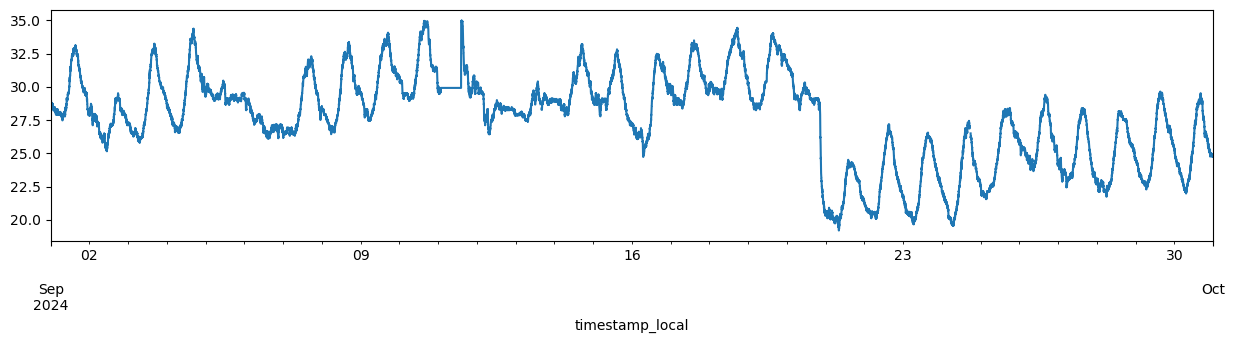

In [205]:
df['T_oa'].plot(figsize=(15,3))
#df['RH_oa'].plot(figsize=(15,3))

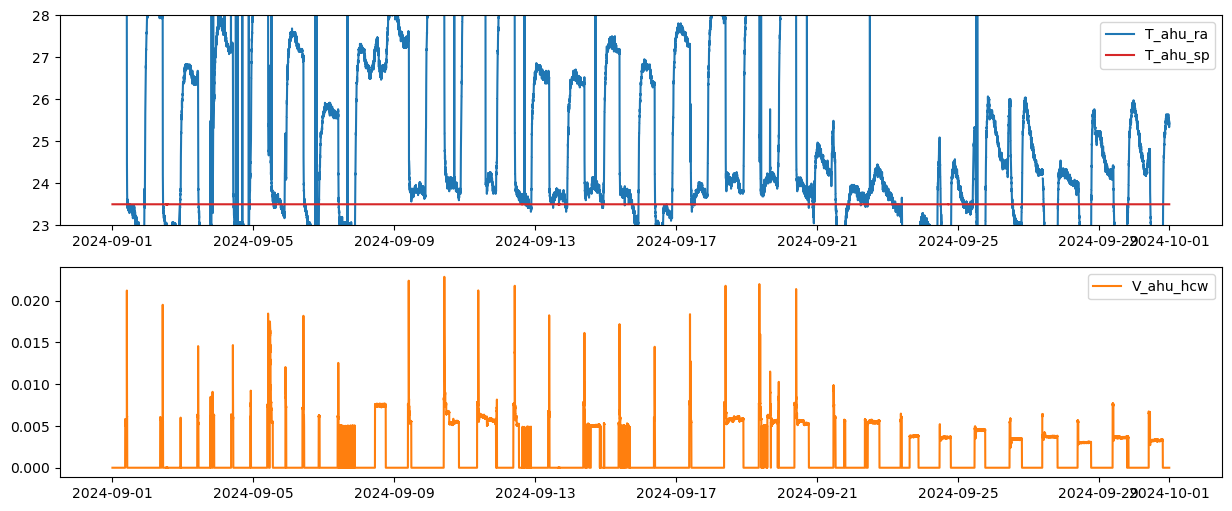

In [206]:
zone_id='ahu5'
fig,ax=plt.subplots(2,1,figsize=(15,6))
ax[0].plot(df.index,df[f'T_ahu_ra_{zone_id}'],label='T_ahu_ra',color='tab:blue')
ax[0].plot(df.index,df[f'T_ahu_sp_{zone_id}'].to_numpy()*0+23.5,label=f'T_ahu_sp',color='tab:red')
ax[0].set_ylim(23.0,28)
ax[1].plot(df.index,df[f'V_ahu_hcw_{zone_id}'],label='V_ahu_hcw',color='tab:orange')

ax[0].legend()
ax[1].legend()
#ax[1].set_ylim(0,0.008)

#df[[]].plot(figsize=(15,3))
#df[['V_ahu_hcw_ahu6']].plot(figsize=(15,3))
#df[['V_ahu_hcw_ahu7']].plot(figsize=(15,3))


<Axes: xlabel='timestamp_local'>

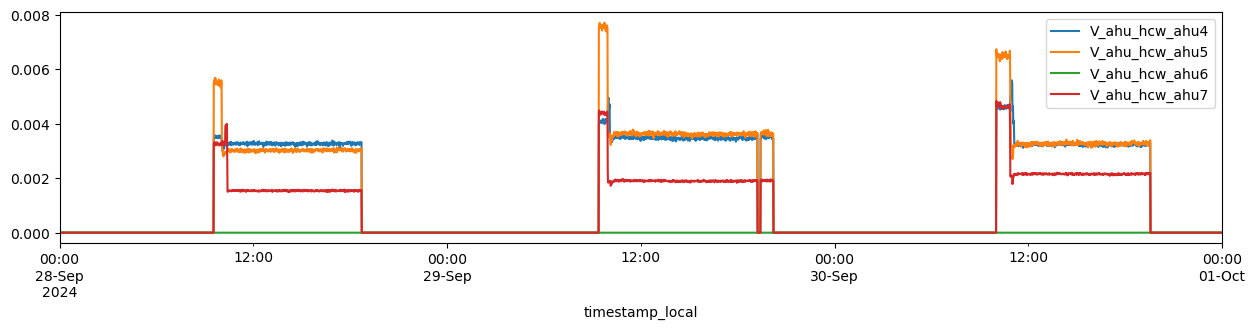

In [207]:
start_time=pd.Timestamp("2024-09-28",tz="Asia/Seoul")
end_time=start_time+pd.Timedelta("72 h")
df[(df.index>=start_time)&(df.index<=end_time)][['V_ahu_hcw_ahu4','V_ahu_hcw_ahu5','V_ahu_hcw_ahu6','V_ahu_hcw_ahu7']].plot(figsize=(15,3))


In [208]:
season='summer'
start_time=pd.Timestamp("2024-09-28",tz="Asia/Seoul")


end_time=start_time+pd.Timedelta("72 h")


df=df[(df.index>=start_time) & (df.index<end_time)].copy()
df['time']=np.arange(df.shape[0])*60


<Axes: xlabel='timestamp_local'>

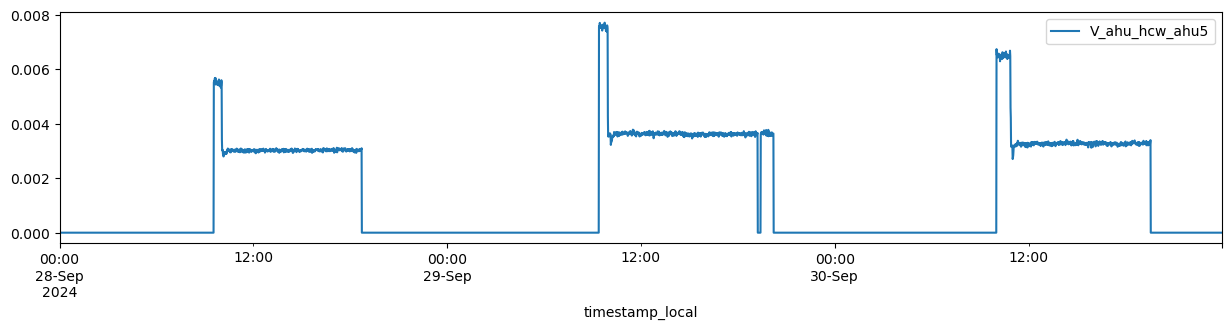

In [209]:
df[df.index>=start_time][['V_ahu_hcw_ahu5']].plot(figsize=(15,3))




In [210]:
#df[df.index>=pd.Timestamp("2024-09-28",tz='Asia/Seoul')][['P_ahu_elec2_ahu7']].plot(figsize=(15,3))

In [211]:
#df[df.index>=pd.Timestamp("2024-09-28",tz='Asia/Seoul')][['P_ahu_elec2_ahu7']].to_numpy()

In [212]:
df

,Unnamed: 0,timestamp_local,T_cws1,T_cwr1,T_cws3,T_cwr3,T_chws,T_chwr,i_ct1,i_ct2,...,i_fan_ahu5,P_ahu_elec1_ahu5,P_ahu_elec2_ahu5,V_ahu_hcw_ahu5,cum_ahu_hcw_ahu5,T_ahu_hcwr_ahu5,T_ahu_hcws_ahu5,V_ahu_sa_ahu5,V_ahu_ea_ahu5,time
timestamp_local,,,,,,,,,,,,,,,,,,,,,
2024-09-28 00:00:00+09:00,38880,2024-09-28 00:00:00+09:00,29.799999,29.799999,30.299999,22.100000,15.5,14.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.7332,19.3198,0.0,0.0,0
2024-09-28 00:01:00+09:00,38881,2024-09-28 00:01:00+09:00,30.000000,29.799999,30.200001,22.200001,15.5,14.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.7405,19.3335,0.0,0.0,60
2024-09-28 00:02:00+09:00,38882,2024-09-28 00:02:00+09:00,29.799999,29.799999,30.299999,22.200001,15.3,14.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.6304,19.4170,0.0,0.0,120
2024-09-28 00:03:00+09:00,38883,2024-09-28 00:03:00+09:00,29.799999,29.799999,30.299999,22.200001,15.5,14.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.6320,19.3750,0.0,0.0,180
2024-09-28 00:04:00+09:00,38884,2024-09-28 00:04:00+09:00,30.000000,29.799999,30.200001,22.200001,15.5,14.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.6324,19.4722,0.0,0.0,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30 23:55:00+09:00,43195,2024-09-30 23:55:00+09:00,30.200001,30.299999,30.700001,24.100000,14.8,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.7524,19.4863,0.0,0.0,258900
2024-09-30 23:56:00+09:00,43196,2024-09-30 23:56:00+09:00,30.200001,30.299999,30.700001,24.200001,15.0,13.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.7832,19.3892,0.0,0.0,258960
2024-09-30 23:57:00+09:00,43197,2024-09-30 23:57:00+09:00,30.200001,30.299999,30.700001,24.100000,14.8,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.7757,19.4307,0.0,0.0,259020


In [213]:



zone_id_list=['ahu4','ahu5','ahu6','ahu7']

for zid in zone_id_list:
    cname_list=[f'T_ahu_sp_{zid}']
    for cname in cname_list:
        test_vec=df[cname].to_numpy()
        imp=Imputation(test_vec,interpolation_method='ffill',interpolation_limit=30)
        imp.impute_minmax(min_val=0,max_val=50)
        imp.impute_state(n_state=3,state_th=0,interpolation_method='ffill')
        df[cname]=imp.array.copy()
    
    cname_list=[f'T_ahu_ra_{zid}',f'T_ahu_sa_{zid}',f'T_ahu_ma_{zid}']
    for cname in cname_list:
        test_vec=df[cname].to_numpy()
        imp=Imputation(test_vec,interpolation_method='linear',interpolation_limit=30)
        
        imp.impute_minmax(min_val=0,max_val=50,interpolation_method='ffill')
        imp.impute_change(th=3,th_len=15,interpolation_method='linear')
        df[cname]=imp.array.copy()
        
    cname_list=[f'P_ahu_elec1_{zid}',f'P_ahu_elec2_{zid}',f'cum_ahu_hcw_{zid}']
    for cname in cname_list:
        test_vec=df[cname].to_numpy()
        imp=Imputation(test_vec,interpolation_method='linear',interpolation_limit=30)
        imp.impute_minmax(min_val=0,max_val=np.inf)
        #imp.impute_change(th=7)
        df[cname]=imp.array.copy()
        
    cname_list=[f'O_ahu_cv_{zid}',f'O_ahu_hv_{zid}']
    for cname in cname_list:
        if cname in df.columns:
            test_vec=df[cname].to_numpy()
            imp=Imputation(test_vec,interpolation_method='linear',interpolation_limit=30)
            imp.impute_minmax(min_val=0,max_val=100)
            df[cname]=imp.array.copy()
    
    cname_list=[f'T_ahu_hcwr_{zid}',f'T_ahu_hcws_{zid}']
    for cname in cname_list:
        test_vec=df[cname].to_numpy()
        imp=Imputation(test_vec,interpolation_method='linear',interpolation_limit=30)
        imp.impute_minmax(min_val=0,max_val=65,interpolation_method='ffill')
        imp.impute_change(th=6,th_len=15,interpolation_method='linear')
        df[cname]=imp.array.copy()
    cname_list=[f'V_ahu_sa_{zid}',f'V_ahu_hcw_{zid}']
    for cname in cname_list:
        test_vec=df[cname].to_numpy()
        imp=Imputation(test_vec,interpolation_method='ffill',interpolation_limit=30)
        imp.impute_minmax(min_val=0,max_val=15,interpolation_method='ffill')
        #imp.impute_change(th=6,th_len=15,interpolation_method='linear')
        df[cname]=imp.array.copy()
    
    
        
        
cname_list=[f'T_oa']
for cname in cname_list:
    test_vec=df[cname].to_numpy()
    imp=Imputation(test_vec,interpolation_method='linear',interpolation_limit=30)
    imp.impute_change(th=4,th_len=30,interpolation_method='linear')
    
    imp.impute_minmax(min_val=-30,max_val=50)
    
    df[cname]=imp.array.copy()
    

# cname_list=[f'RH_oa']
# for cname in cname_list:
#     test_vec=df[cname].to_numpy()
#     imp=Imputation(test_vec,interpolation_method='linear',interpolation_limit=30)
#     imp.impute_minmax(min_val=0,max_val=100)
#     df[cname]=imp.array.copy()


In [214]:




for zid in zone_id_list:
    if f'O_ahu_cv_{zid}' in df.columns:
        df[f'O_ahu_cv_{zid}']=df[f'O_ahu_cv_{zid}']/100
    if f'O_ahu_hv_{zid}' in df.columns:
        df[f'O_ahu_hv_{zid}']=df[f'O_ahu_hv_{zid}']/100
    
    if f'O_ahu_cv_{zid}' in df.columns and f'O_ahu_hv_{zid}' in df.columns:
        df[f'O_ahu_hcv_{zid}'] = (df[f'O_ahu_cv_{zid}'] + df[f'O_ahu_hv_{zid}']) / 2
    elif f'O_ahu_cv_{zid}' in df.columns:
        df[f'O_ahu_hcv_{zid}'] = df[f'O_ahu_cv_{zid}']
    elif f'O_ahu_hv_{zid}' in df.columns:
        df[f'O_ahu_hcv_{zid}'] = df[f'O_ahu_hv_{zid}']
        
    if f'O_ahu_oa_{zid}' in df.columns:
        df[f'O_ahu_oa_{zid}']=df[f'O_ahu_oa_{zid}']/100
    
    df[f'P_ahu_elec_{zid}']=df[f'P_ahu_elec1_{zid}']+df[f'P_ahu_elec2_{zid}']
    df[f'i_ahu_on_{zid}']=(df[f'P_ahu_elec_{zid}'].to_numpy()>0)*1
    if season=="winter":
        df[f'i_ahu_cool_on_{zid}']=0
        df[f'i_ahu_heat_on_{zid}']=df[f'i_ahu_on_{zid}'].to_numpy()
    else:
        df[f'i_ahu_heat_on_{zid}']=0
        df[f'i_ahu_cool_on_{zid}']=df[f'i_ahu_on_{zid}'].to_numpy()
    #df[f'V_ahu_hcw_{zid}']=df[f'V_ahu_hcw_{zid}']#/3600
    df[f'm_ahu_hcw_{zid}']=df[f'V_ahu_hcw_{zid}']*1000
    df[f'm_ahu_sa_{zid}']=df[f'V_ahu_sa_{zid}']*1.2
    if season=="summer":
        df[f'Q_ahu_hcwcal_{zid}']=df[f'm_ahu_hcw_{zid}']*4.184*(df[f'T_ahu_hcwr_{zid}']-df[f'T_ahu_hcws_{zid}'])*df[f'i_ahu_on_{zid}']
        df[f'Q_ahu_sacal_{zid}']=df[f'V_ahu_sa_{zid}']*1.2*(df[f'T_ahu_ma_{zid}']-df[f'T_ahu_sa_{zid}'])*df[f'i_ahu_on_{zid}']
    else:
        df[f'Q_ahu_hcwcal_{zid}']=df[f'm_ahu_hcw_{zid}']*4.184*(df[f'T_ahu_hcws_{zid}']-df[f'T_ahu_hcwr_{zid}'])*df[f'i_ahu_on_{zid}']
        df[f'Q_ahu_sacal_{zid}']=df[f'V_ahu_sa_{zid}']*1.2*(df[f'T_ahu_sa_{zid}']-df[f'T_ahu_ma_{zid}'])*df[f'i_ahu_on_{zid}']
        
    # ax[1].plot(df_temp.index,df_temp[f'T_ahu_hcwr_{zone_id}'],label='T_ahu_hcwr',color='tab:red')
    # ax[1].plot(df_temp.index,df_temp[f'T_ahu_hcws_{zone_id}'],label='T_ahu_hcws',color='tab:blue')
    # ax1=ax[1].twinx()
    # ax[1].legend(loc='upper left')
    # ax1.plot(df_temp.index,df_temp[f'V_ahu_hcw_{zone_id}'],label='V_hcw',color='tab:green')


C:\Users\ecosa\AppData\Local\Temp\ipykernel_8196\2937630499.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'i_ahu_on_{zid}']=(df[f'P_ahu_elec_{zid}'].to_numpy()>0)*1
C:\Users\ecosa\AppData\Local\Temp\ipykernel_8196\2937630499.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'i_ahu_heat_on_{zid}']=0
C:\Users\ecosa\AppData\Local\Temp\ipykernel_8196\2937630499.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Co

In [215]:


df['V_ch1_hcw']=np.clip(df['V_ch1_chws'].to_numpy(),0,np.inf)
df['V_ch3_hcw']=np.clip(df['V_ch3_chws'].to_numpy(),0,np.inf)
df['V_ch_hcw']=df['V_ch1_hcw']+df['V_ch3_hcw']
df['m_ch_hcw']=df['V_ch_hcw']*1000


df['V_ct_hcw']=df['V_ct1_cws']+df['V_ct3_cws']
df['m_ct_hcw']=df['V_ct_hcw']*1000


C:\Users\ecosa\AppData\Local\Temp\ipykernel_8196\44951473.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['V_ch1_hcw']=np.clip(df['V_ch1_chws'].to_numpy(),0,np.inf)
C:\Users\ecosa\AppData\Local\Temp\ipykernel_8196\44951473.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['V_ch3_hcw']=np.clip(df['V_ch3_chws'].to_numpy(),0,np.inf)
C:\Users\ecosa\AppData\Local\Temp\ipykernel_8196\44951473.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

<Axes: xlabel='timestamp_local'>

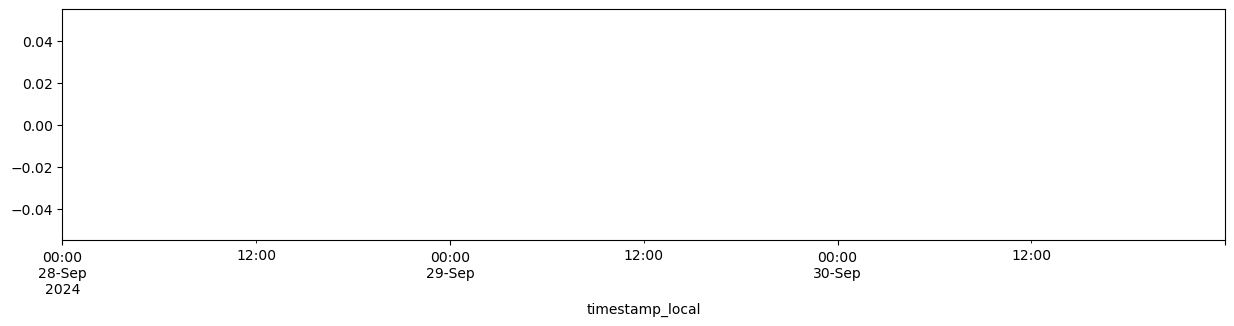

In [216]:
df['m_ch_hcw'].plot(figsize=(15,3))

In [217]:

df['i_ch_on']=(df['m_ch_hcw'].to_numpy()>0)*1
df['i_ct_on']=(df['m_ct_hcw'].to_numpy()>0)*1



i_ch_on=df['i_ch_on'].to_numpy()

## TODO TBD
# #df['P_ch_elec']=df['P_ch1_elec']+df['P_ch2_elec']
# df['P_ch_gas']=df['P_ch1_gas']+df['P_ch2_gas']
# df[f'P_pump_chw']=df[f'P_pump_chw2']+df[f'P_pump_chw1']
# df[f'P_pump_cw']=df[f'P_pump_cw1']+df[f'P_pump_cw2']

# V_ch1_hcw_temp=df['V_ch1_hcw'].to_numpy().copy()
# V_ch2_hcw_temp=df['V_ch2_hcw'].to_numpy().copy()
# V_ch1_hcw_temp[V_ch1_hcw_temp==0]=0.1
# V_ch2_hcw_temp[V_ch2_hcw_temp==0]=0.1
# T_ch_hcws=(df['T_ch1_hcws'].to_numpy()*V_ch1_hcw_temp+df['T_ch2_hcws'].to_numpy()*V_ch2_hcw_temp)/(V_ch1_hcw_temp+V_ch2_hcw_temp)
# df['T_ch_hcws']=T_ch_hcws

C:\Users\ecosa\AppData\Local\Temp\ipykernel_8196\3422024466.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['i_ch_on']=(df['m_ch_hcw'].to_numpy()>0)*1
C:\Users\ecosa\AppData\Local\Temp\ipykernel_8196\3422024466.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['i_ct_on']=(df['m_ct_hcw'].to_numpy()>0)*1


In [218]:

# zone_id_list=['ahu9']

# for zid in zone_id_list:
#     cname_list=[f'T_ahu_ra_{zid}',f'T_ahu_sa_{zid}']
#     for cname in cname_list:
#         test_vec=df_temp[cname].to_numpy()
#         imp=Imputation(test_vec,interpolation_method='linear',interpolation_limit=30)
#         imp.impute_minmax(min_val=0,max_val=50,interpolation_method='ffill')
#         imp.impute_change(th=3,len=15,interpolation_method='linear')
#         df_temp[cname]=imp.array.copy()

In [219]:
df[f'T_ahu_sp_{zone_id}'].to_numpy()

array([25., 25., 25., ..., 24., 24., 24.])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


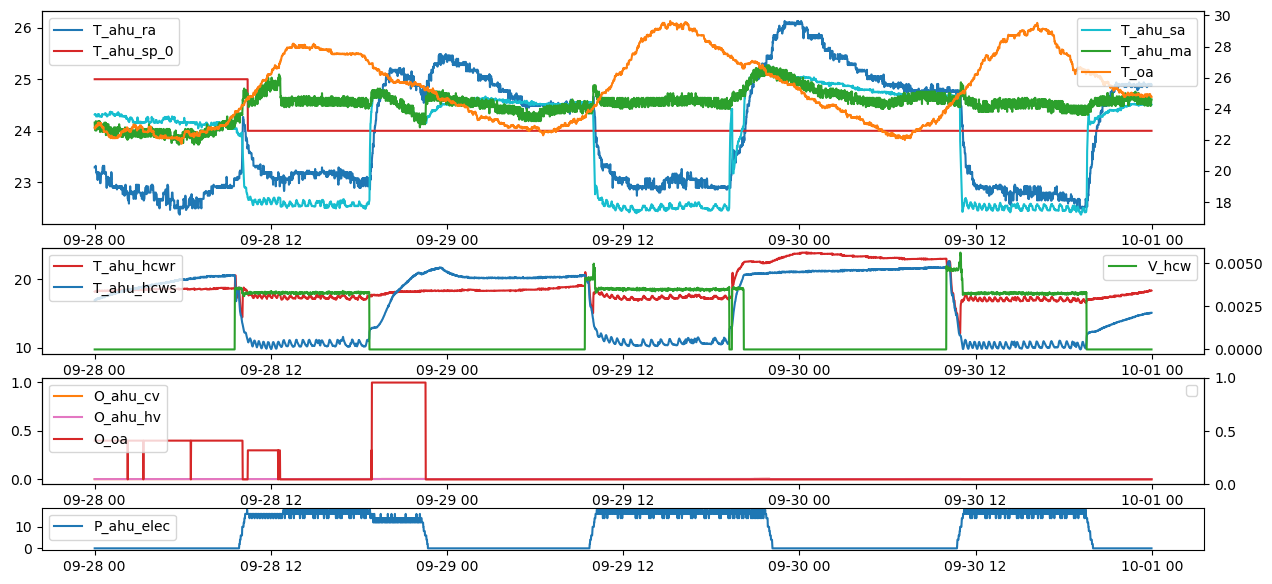

In [220]:
sp_diff=0
zone_id='ahu4'
fig,ax=plt.subplots(nrows=4,ncols=1,figsize=(15,7),gridspec_kw={'height_ratios':[1.0,0.5,0.5,0.2]})
ax[0].plot(df.index,df[f'T_ahu_ra_{zone_id}'],label='T_ahu_ra',color='tab:blue')
ax[0].plot(df.index,df[f'T_ahu_sp_{zone_id}'].to_numpy()+sp_diff,label=f'T_ahu_sp_{sp_diff}',color='tab:red')
ax0=ax[0].twinx()
ax0.plot(df.index,df[f'T_ahu_sa_{zone_id}'],label='T_ahu_sa',color='tab:cyan')
ax0.plot(df.index,df[f'T_ahu_ma_{zone_id}'],label='T_ahu_ma',color='tab:green')
ax0.plot(df.index,df[f'T_oa'],label='T_oa',color='tab:orange')
ax[0].legend(loc='upper left')
ax0.legend(loc="upper right")

ax[1].plot(df.index,df[f'T_ahu_hcwr_{zone_id}'],label='T_ahu_hcwr',color='tab:red')
ax[1].plot(df.index,df[f'T_ahu_hcws_{zone_id}'],label='T_ahu_hcws',color='tab:blue')
ax1=ax[1].twinx()
ax[1].legend(loc='upper left')
ax1.plot(df.index,df[f'V_ahu_hcw_{zone_id}'],label='V_hcw',color='tab:green')
#ax1.plot(df.index,df[f'cum_ahu_hcw_{zone_id}'],label='cum_hcw',color='tab:cyan')
#ax1.set_ylim(0,0.006)
#


ax1.legend(loc='upper right')

ax[2].plot(df.index,df[f'O_ahu_cv_{zone_id}'],label='O_ahu_cv',color='tab:orange')
ax[2].plot(df.index,df[f'O_ahu_hv_{zone_id}'],label='O_ahu_hv',color='tab:pink')
#ax[2].plot(df.index,df[f'i_ahu_on_{zone_id}'],label='i_ahu_on',color='tab:blue')
ax[2].plot(df.index,df[f'O_ahu_oa_{zone_id}'],label='O_oa',color='tab:red')

ax2=ax[2].twinx()
ax[2].legend(loc='upper left')
#ax2.plot(df.index,df[f'Q_ahu_hcw_{zone_id}']*-1,label='Q_hcw',color='tab:olive')
#ax2.plot(df.index,df[f'Q_ahu_hcwcal_{zone_id}'],label='Q_hcw_cal',color='tab:cyan')
ax2.legend(loc='upper right')

ax[3].plot(df.index,df[f'P_ahu_elec_{zone_id}'],label='P_ahu_elec')
ax[3].legend()
#i_ahu_onoff_ahu9


# T_ahu_hcws_ahu11', 'T_ahu_hcwr_ahu11
# T_ahu_ma_ahu9, T_ahu_ra_ahu9
# O_ahu_cv_ahu9, O_ahu_hv_ahu9
# V_ahu_hcw_ahu9, T_oa, RH_oa
# T_ahu_sa_ahu9

<Axes: xlabel='timestamp_local'>

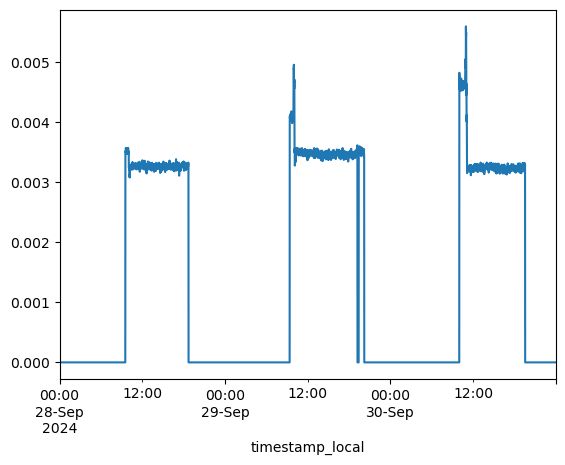

In [221]:
df[f'V_ahu_hcw_{zone_id}'].plot()

In [222]:

# TODO plant operation. TBD

# fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(12,9))
# ax[0].plot(df_temp.index,df_temp[f'T_ch1_hcws'],label='T_ch1_hcws',color='tab:blue')
# ax[0].plot(df_temp.index,df_temp[f'T_ch2_hcws'],label='T_ch2_hcws',color='tab:orange')
# ax[0].plot(df_temp.index,df_temp[f'T_ch_hcwr'],label='T_ch_hcwr',color='tab:green')
# ax[0].set_ylim(40,55)
# #ax0=ax[0].twinx()
# #ax[1].plot(df_temp.index,df_temp[f'cum_ch_hcw'],label='cum_ch',color='tab:red')
# #ax[1].plot(df_temp.index,df_temp[f'V_ch_hcw'],label='V_ch',color='tab:orange')
# #ax[1].plot(df_temp.index,df_temp[f'cum_ch1_hcw'],label='cum_ch1',color='tab:blue')
# ax[1].plot(df_temp.index,df_temp[f'V_ch1_hcw'],label='V_ch1',color='tab:cyan')
# #ax[1].plot(df_temp.index,df_temp[f'cum_ch2_hcw'],label='cum_ch2',color='tab:green')
# ax[1].plot(df_temp.index,df_temp[f'V_ch2_hcw'],label='V_ch2',color='tab:olive')
# ax[1].legend()
# ax[0].legend(loc='upper left')
# #ax0.legend(loc="upper right")



# ax[2].plot(df_temp.index,df_temp[f'P_ch1_elec'],label='P_ch1_elec1',color='tab:blue')
# ax[2].plot(df_temp.index,df_temp[f'P_ch2_elec'],label='P_ch1_elec2',color='tab:orange')
# ax2=ax[2].twinx()

# ax2.plot(df_temp.index,df_temp[f'P_ch1_gas'],label='P_ch1_gas',color='tab:red')
# ax2.plot(df_temp.index,df_temp[f'P_ch2_gas'],label='P_ch2_gas',color='tab:pink')
# # P_ch2_gas
# # P_ch2_gas.1
# ax[2].legend(loc='upper left')
# ax2.legend(loc="upper right")

# #  'T_ct2_cwr', 'T_ct2_cws', 'i_ct2_fan1',
# #       'i_ct2_fan2', 'T_ct11_cwr', 'T_ct11_cws',

# ax[3].plot(df_temp.index,df_temp[f'T_ct_cwr'],label='T_ct_cwr',color='tab:blue')
# ax[3].plot(df_temp.index,df_temp[f'T_ct_cws'],label='T_ct_cws',color='tab:orange')

# #ax[3].plot(df_temp.index,df_temp[f'T_ct2_cws'],label='T_ct2_cws',color='tab:cyan')
# #ax[3].plot(df_temp.index,df_temp[f'T_ct2_cwr'],label='T_ct2_cwr',color='tab:red')

# #ax[21].plot(df_temp.index,df_temp[f'T_ch_hcwr'],label='T_ch_hcwr',color='tab:green')

# #ax2=ax[2].twinx()
# #ax[4].plot(df_temp.index,df_temp[f'cum_ct1_hcw'],label='V_ct1',color='tab:red')
# #ax[4].plot(df_temp.index,df_temp[f'cum_ct2_hcw'],label='V_ct2',color='tab:cyan')
# ax[4].plot(df_temp.index,df_temp[f'V_ct1_hcw'],label='V_ct1',color='tab:orange')
# ax[4].plot(df_temp.index,df_temp[f'V_ct2_hcw'],label='V_ct2',color='tab:blue')

# ax[3].legend(loc='upper left')
# ax[4].legend(loc="upper right")

# #  'V_ct1_hcw',
# #       'v_ct1_hcw', 'cum_ct1_hcw', 'V_ct2_hcw', 'v_ct2_hcw',
# #       'cum_ct2_hcw'


# # ax[1].plot(df_temp.index,df_temp[f'T_ahu_hcwr_{zone_id}'],label='T_ahu_hcwr',color='tab:red')
# # ax[1].plot(df_temp.index,df_temp[f'T_ahu_hcws_{zone_id}'],label='T_ahu_hcws',color='tab:blue')
# # ax1=ax[1].twinx()
# # ax[1].legend(loc='upper left')
# # ax1.plot(df_temp.index,df_temp[f'V_ahu_hcw_{zone_id}']*100,label='V_hcw',color='tab:green')
# # ax1.legend(loc='upper right')
# # ax1.plot(df_temp.index,df_temp[f'O_ahu_cv_{zone_id}']/100,label='O_ahu_cv',color='tab:orange')
# # ax1.plot(df_temp.index,df_temp[f'O_ahu_hv_{zone_id}']/100,label='O_ahu_hv',color='tab:pink')

# # T_ahu_hcws_ahu11', 'T_ahu_hcwr_ahu11
# # T_ahu_ma_ahu9, T_ahu_ra_ahu9
# # O_ahu_cv_ahu9, O_ahu_hv_ahu9
# # V_ahu_hcw_ahu9, T_oa, RH_oa
# # T_ahu_sa_ahu9

In [223]:
# 1 time
# 2 RH_oa => in_oa_RH_ahu
# 3 T_oa = > in_oa_temp_dry_C_ahu
# 4 T_ahu_sp_ahu9 => in_cooling_SP_C_ahu
# 5 T_ahu_ra_ahu9 => in_room_temp_C_ahu
# 6 i_ahu_damper_ahu9 => in_damper_position_ahu
# 7 *i_ahu_on_ahu9 => in_fan_speed_ahu
# 8 T_ahu_hcws_ahu9 => in_chilled_water_temp_C_ahu
# *i_ahu_on_ahu9 => in_cooling_signal_ahu

# 9 T_ahu_sa_ahu9 => out_supply_air_temp_C_ahu
# 10 Q_ahu_hcwcal_ahu9 => out_load_kW_chiller_ahu
# 11 m_ahu_hcw_ahu9 => out_chilled_water_mass_flow_ahu
# 12 T_ahu_ma_ahu9 => out_mixed_air_temp_C_ahu
# 13 T_ahu_hcwr_ahu9 => out_chilled_water_return_temp_C_ahu
# 14 P_ahu_elec_ahu9 => out_fan_power_kW_ahu
# out_fan_power_kW_ahu




common_cnames=['time','RH_oa',f'T_oa']#,'RH_oa']
# zone_ahu_cnames=[]
for zid in zone_id_list:
    
    ahu_cnames=[f'T_ahu_sp_{zid}',f'T_ahu_ra_{zid}',f'O_ahu_oa_{zid}',
                 f'i_ahu_cool_on_{zid}',f'i_ahu_heat_on_{zid}',f'T_ahu_hcws_{zid}',
                  f'T_ahu_sa_{zid}',f'Q_ahu_hcwcal_{zid}',f'm_ahu_hcw_{zid}',
                  f'T_ahu_ma_{zid}',f'T_ahu_hcwr_{zid}',f'P_ahu_elec_{zid}',
                  f'Q_ahu_sacal_{zid}',f'm_ahu_sa_{zid}']
    common_cnames.extend(ahu_cnames)
    #zone_ahu_cnames.append(ahu_cnames)


In [236]:
zone_id_list

['ahu4', 'ahu5', 'ahu6', 'ahu7']

In [224]:
common_cnames

['time',
 'RH_oa',
 'T_oa',
 'T_ahu_sp_ahu4',
 'T_ahu_ra_ahu4',
 'O_ahu_oa_ahu4',
 'i_ahu_cool_on_ahu4',
 'i_ahu_heat_on_ahu4',
 'T_ahu_hcws_ahu4',
 'T_ahu_sa_ahu4',
 'Q_ahu_hcwcal_ahu4',
 'm_ahu_hcw_ahu4',
 'T_ahu_ma_ahu4',
 'T_ahu_hcwr_ahu4',
 'P_ahu_elec_ahu4',
 'Q_ahu_sacal_ahu4',
 'm_ahu_sa_ahu4',
 'T_ahu_sp_ahu5',
 'T_ahu_ra_ahu5',
 'O_ahu_oa_ahu5',
 'i_ahu_cool_on_ahu5',
 'i_ahu_heat_on_ahu5',
 'T_ahu_hcws_ahu5',
 'T_ahu_sa_ahu5',
 'Q_ahu_hcwcal_ahu5',
 'm_ahu_hcw_ahu5',
 'T_ahu_ma_ahu5',
 'T_ahu_hcwr_ahu5',
 'P_ahu_elec_ahu5',
 'Q_ahu_sacal_ahu5',
 'm_ahu_sa_ahu5',
 'T_ahu_sp_ahu6',
 'T_ahu_ra_ahu6',
 'O_ahu_oa_ahu6',
 'i_ahu_cool_on_ahu6',
 'i_ahu_heat_on_ahu6',
 'T_ahu_hcws_ahu6',
 'T_ahu_sa_ahu6',
 'Q_ahu_hcwcal_ahu6',
 'm_ahu_hcw_ahu6',
 'T_ahu_ma_ahu6',
 'T_ahu_hcwr_ahu6',
 'P_ahu_elec_ahu6',
 'Q_ahu_sacal_ahu6',
 'm_ahu_sa_ahu6',
 'T_ahu_sp_ahu7',
 'T_ahu_ra_ahu7',
 'O_ahu_oa_ahu7',
 'i_ahu_cool_on_ahu7',
 'i_ahu_heat_on_ahu7',
 'T_ahu_hcws_ahu7',
 'T_ahu_sa_ahu7',
 'Q_ah

In [225]:
# for j in np.arange(len(ahu_cnames)):
#     for i in np.arange(len(zone_id_list)):
#         common_cnames.append(zone_ahu_cnames[i][j])
    

In [231]:

for i,cn in enumerate(common_cnames):
    print(i+1,cn)


1 time
2 RH_oa
3 T_oa
4 T_ahu_sp_ahu4
5 T_ahu_ra_ahu4
6 O_ahu_oa_ahu4
7 i_ahu_cool_on_ahu4
8 i_ahu_heat_on_ahu4
9 T_ahu_hcws_ahu4
10 T_ahu_sa_ahu4
11 Q_ahu_hcwcal_ahu4
12 m_ahu_hcw_ahu4
13 T_ahu_ma_ahu4
14 T_ahu_hcwr_ahu4
15 P_ahu_elec_ahu4
16 Q_ahu_sacal_ahu4
17 m_ahu_sa_ahu4
18 T_ahu_sp_ahu5
19 T_ahu_ra_ahu5
20 O_ahu_oa_ahu5
21 i_ahu_cool_on_ahu5
22 i_ahu_heat_on_ahu5
23 T_ahu_hcws_ahu5
24 T_ahu_sa_ahu5
25 Q_ahu_hcwcal_ahu5
26 m_ahu_hcw_ahu5
27 T_ahu_ma_ahu5
28 T_ahu_hcwr_ahu5
29 P_ahu_elec_ahu5
30 Q_ahu_sacal_ahu5
31 m_ahu_sa_ahu5
32 T_ahu_sp_ahu6
33 T_ahu_ra_ahu6
34 O_ahu_oa_ahu6
35 i_ahu_cool_on_ahu6
36 i_ahu_heat_on_ahu6
37 T_ahu_hcws_ahu6
38 T_ahu_sa_ahu6
39 Q_ahu_hcwcal_ahu6
40 m_ahu_hcw_ahu6
41 T_ahu_ma_ahu6
42 T_ahu_hcwr_ahu6
43 P_ahu_elec_ahu6
44 Q_ahu_sacal_ahu6
45 m_ahu_sa_ahu6
46 T_ahu_sp_ahu7
47 T_ahu_ra_ahu7
48 O_ahu_oa_ahu7
49 i_ahu_cool_on_ahu7
50 i_ahu_heat_on_ahu7
51 T_ahu_hcws_ahu7
52 T_ahu_sa_ahu7
53 Q_ahu_hcwcal_ahu7
54 m_ahu_hcw_ahu7
55 T_ahu_ma_ahu7
56 T_ahu_hc

In [232]:
zone_id_list

['ahu4', 'ahu5', 'ahu6', 'ahu7']

In [237]:
out_dat=df[common_cnames].interpolate().to_numpy()

In [238]:
out_dat.shape

(4320, 59)

In [239]:

sio.savemat(f"lottemart_{season}_{start_time.strftime('%Y-%m-%d')}.mat",{"names":ahu_cnames,"data":out_dat})

In [88]:
df.columns[df.columns.str.contains('ct')]

Index(['i_ct1', 'i_ct2', 'i_ct3', 'i_ctpump21', 'i_ctpump22', 'i_ctpump23',
       'i_ctpump11', 'i_ctpump21.1', 'P_ct21', 'P_ct22', 'P_ct31', 'P_ct32',
       'V_ct1_cws', 'V_ct3_cws', 'V_ct_hcw', 'm_ct_hcw', 'i_ct_on'],
      dtype='object')

In [89]:
df.columns[df.columns.str.contains('P_')]

Index(['P_cw1', 'P_cw2', 'P_ct21', 'P_ct22', 'P_ct31', 'P_ct32', 'P_chw21',
       'P_chw22', 'P_chw23', 'P_chw12', 'P_cw11', 'P_cw12', 'P_boiler_gas',
       'P_ch1_gas', 'P_ch3_gas', 'P_ahu_elec1_ahu4', 'P_ahu_elec2_ahu4',
       'P_ahu_elec1_ahu6', 'P_ahu_elec2_ahu6', 'P_ahu_elec1_ahu7',
       'P_ahu_elec2_ahu7', 'P_ahu_elec1_ahu5', 'P_ahu_elec2_ahu5',
       'P_ahu_elec_ahu4', 'P_ahu_elec_ahu5', 'P_ahu_elec_ahu6',
       'P_ahu_elec_ahu7'],
      dtype='object')

In [70]:

# ax[2].plot(df_temp.index,df_temp[f'P_ch1_elec'],label='P_ch1_elec1',color='tab:blue')
# ax[2].plot(df_temp.index,df_temp[f'P_ch2_elec'],label='P_ch1_elec2',color='tab:orange')
# ax2=ax[2].twinx()

# ax2.plot(df_temp.index,df_temp[f'P_ch1_gas'],label='P_ch1_gas',color='tab:red')
# ax2.plot(df_temp.index,df_temp[f'P_ch2_gas'],label='P_ch2_gas',color='tab:pink')


In [71]:


#df_temp['T_ch1_hcws'].to_numpy()[i_ch_on==1]*df_temp['V_ch1_hcw'].to_numpy()[i_ch_on==1]+df_temp['T_ch2_hcws'].to_numpy()[i_ch_on==1]*df_temp['V_ch2_hcw'].to_numpy()[i_ch_on==1]/(df_temp['V_ch_hcw'].to_numpy()[i_ch_on==1])

# df_temp['T_ch_hcws']=df_temp['T_ch1_hcws'].to_numpy()

In [72]:

df_temp['Q_chiller']=df_temp['i_ch_on']*df_temp['m_ch_hcw']*(df_temp['T_ch_hcwr']-df_temp['T_ch_hcws'])*4.184
df_temp['Q_ct']=df_temp['i_ct_on']*df_temp['m_ct_hcw']*(df_temp['T_ct_cwr']-df_temp['T_ct_cws'])*4.184

<Axes: xlabel='timestamp_local'>

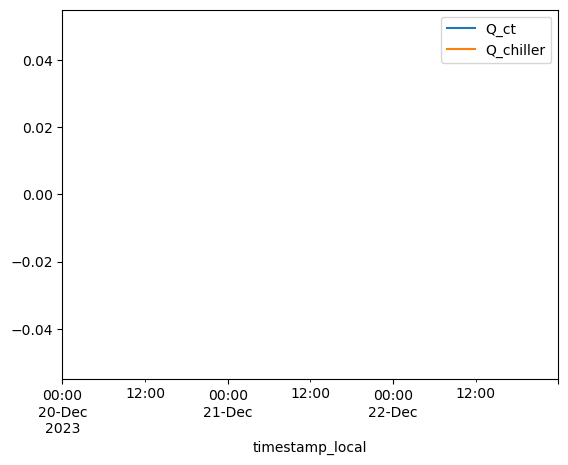

In [73]:
df_temp[['Q_ct','Q_chiller']].plot()

In [74]:
# 1 time
# 2 RH_oa => in_oa_RH_ahu
# 3 T_oa = > in_oa_temp_dry_C_ahu
# 4 T_ct_cws => in_condensor_supply_SP_C
# 5 T_ch_hcws => in_chilled_water_SP_C
# 6 m_ch_hcw => in_chilled_water_mass_flow_kgps
# 7 T_ch_hcwr => in_chilled_water_return_temp_C
# 8 i_ch_on => in_is_hvac_available

# *T_ch_hcws => out_chilled_water_supply_temp_C
# 9 m_ct_hcw => out_condensor_water_mass_flow_kgps
# 10 T_ct_cwr => out_condensor_water_return_temp_C
# 11 P_ch_gas => out_heat_m3s_chiller
# 12 P_ch_elec => out_power_kW_chiller
# 13 Q_chiller => out_load_kW_chiller
# 14 P_pump_chw => out_power_kW_chiller_pump
# 15 P_pump_cw => out_power_kW_condensor_pump
#

plant_cnames=['time','RH_oa','T_oa',
              'T_ct_cws','T_ch_hcws','m_ch_hcw',
              'T_ch_hcwr','i_ch_on','m_ct_hcw',
              'T_ct_cwr','P_ch_gas','P_ch_elec',
              'Q_chiller','P_pump_chw','P_pump_cw']
out_dat=df_temp[plant_cnames].interpolate().to_numpy()

In [75]:
sio.savemat(f"hdc_plant_{season}_{start_time.strftime('%Y-%m-%d')}.mat",{"names":plant_cnames,"data":out_dat})

In [76]:

#sio.savemat(f"hdc_ahu9_{season}_{start_time.strftime('%Y-%m-%d')}.mat",{"csv":out_dat})